<a href="https://colab.research.google.com/github/mwinzie/Football-Analysis-Mchezopesa-Limited/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_Agnes_Mwinzi_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Problem


The objective of this project is to come up with Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly for Mchezopesa Ltd 

## Metrics of Success

## Experimental Design
The following are steps I will follow in order to complete this project:
1. Importing all the necessary libraries
2. Loading the data set
3. Read and clean the data set
4. Exploratory Data Analysis
5. Polynomial Regression
6. Logistic Regression

## Data Appropriateness
The dataset contains information  about football game results from 1872 between countries and FIFA world ranking of the various countries that do play football. The FIFA dataset had data from the year 1993.

In [0]:
#loading the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [0]:
#loading the datasets
ranking = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')

In [0]:
#previewing the number of rows and columns that are in the datasets
print(str(ranking.shape[0]) + ' rows and '+ str(ranking.shape[1]) + ' columns in the ranking dataset')
print('\n')
print(str(results.shape[0]) + ' rows and '+ str(results.shape[1]) + ' columns in the results dataset')


57793 rows and 16 columns in the ranking dataset


40839 rows and 9 columns in the results dataset


In [0]:
#previewing the first two observations in the ranking dataset
ranking.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [0]:
#previewing the first two observations in the results dataset
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [0]:
#creating a new column to show the results of the matches played, either a win or loss or draw
winner = []
for i in range(len(results['home_team'])):
  if results['home_score'][i] > results['away_score'][i]:
    winner.append('win')
  elif results['home_score'][i] < results['away_score'][i]:
    winner.append('lose')
  else:
    winner.append('draw')
    
results['game_result'] = winner

In [0]:
#previewing the game result column has been added
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win


In [0]:
#checking the informations contained in the datasets 
print(results.info())
print('************************')
print(ranking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 10 columns):
date           40839 non-null object
home_team      40839 non-null object
away_team      40839 non-null object
home_score     40839 non-null int64
away_score     40839 non-null int64
tournament     40839 non-null object
city           40839 non-null object
country        40839 non-null object
neutral        40839 non-null bool
game_result    40839 non-null object
dtypes: bool(1), int64(2), object(7)
memory usage: 2.8+ MB
None
************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 no

Here we get to see the datatypes of the columns in the datasets. The results dataset has 40,839 rows and 9 columns while the ranking dataset has 57,793 rows and 16 columns. 

From the data observations in the Fifa ranking csv(ranking dataset), ranking began in the year 1993, so the data before 1993 may not be useful in my model and prediction, hence I shall drop all observations below 1993 in the results dataset.

In [0]:
#dropping rows in the results dataset that are below the year 1993.
#I shall check for uniformity in the date column and then drop
results['date'].unique().tolist()
#converting the date column to date time datatype
results.date = pd.to_datetime(results.date)

In [0]:
#checking to confirm the datatype change
results.dtypes

date           datetime64[ns]
home_team              object
away_team              object
home_score              int64
away_score              int64
tournament             object
city                   object
country                object
neutral                  bool
game_result            object
dtype: object

In [0]:
#previewing the observations in the date column in the results dataset
results['date'].head(2)

0   1872-11-30
1   1873-03-08
Name: date, dtype: datetime64[ns]

In [0]:
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win


In [0]:
#deleting the rows that are below 1993, when FIFA started ranking the teams
#results['year'] = results(['year']< 1993).dropna(how = 'all')
results = results.drop(results[(results.date < '1993-08-08')] .index)


In [0]:
#previewing to see that the dates above 1993-08-08 have been dropped
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,win
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,lose


## Data Cleaning of the ranking dataset

In [0]:
#checking the columns in the ranking dataset
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [0]:
#checking if there exists any null values
ranking.isnull().any()
#the dataset does not have any null values

rank                       False
country_full               False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool

## Data Cleaning of the Results and Ranking datasets

In [0]:
#checking the column names in the results dataset
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [0]:
#checking if there exists any null values
results.isnull().any()
#the dataset does not have any null values

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [0]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month'],
      dtype='object')

In [0]:
results.dtypes

date            datetime64[ns]
home_team               object
away_team               object
home_score               int64
away_score               int64
tournament              object
city                    object
country                 object
neutral                   bool
winning_team            object
dtype: object

In [0]:
#separate date column to month and year for results dataset
results['month']= results.date.dt.month
results['year']=results.date.dt.year

In [0]:
#previewing the dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,win,8,1993
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win,8,1993
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,lose,8,1993


In [0]:
#creating a column for matches showing what team played what team
results['game'] = results['home_team'] +' '+ ' vs ' + ' ' + results['away_team']

In [0]:
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico


In [0]:
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [0]:
#converting the date column in the ranking dataset to type datetime
ranking['rank_date'] = pd.to_datetime(ranking.rank_date)

In [0]:
#separate date column to month and year for results dataset
ranking['month']= ranking.rank_date.dt.month
ranking['year']=ranking.rank_date.dt.year


In [0]:
ranking.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993


In [0]:
#creating the home team dataframe to merge with the ranking dataset using year, month, and country name
hometeam = pd.merge(results, ranking, how = 'left', left_on=['year', 'month', 'home_team'], right_on=['year', 'month', 'country_full'])
hometeam.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,Bolivia,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
#renaming the rank column to show the home team rank
hometeam.rename(columns = {'rank':'hometeam_rank'}, inplace = True)

In [0]:
#previewing the dataset
hometeam.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,hometeam_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,Bolivia,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
hometeam.shape

(22993, 29)

In [0]:
#creating the away team dataframe to merge with the ranking dataset using year, month, and country name
awayteam = pd.merge(results, ranking, how = 'left', left_on=['year', 'month', 'away_team'], right_on=['year', 'month', 'country_full'])
awayteam.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,22.0,Uruguay,URU,0.0,47.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,14.0,Mexico,MEX,0.0,42.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08


In [0]:
#renaming the rank column to show the awy team rank
awayteam.rename(columns = {'rank':'awayteam_rank'}, inplace = True)

In [0]:
awayteam.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,awayteam_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,22.0,Uruguay,URU,0.0,47.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,14.0,Mexico,MEX,0.0,42.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08


In [0]:
awayteam.shape

(23000, 29)

In [0]:
#merging the hometeam and awayteam dataframes
teams = pd.merge(hometeam, awayteam , how ='left', left_on=['month','year', 'home_team', 'away_team'], right_on=['month','year', 'home_team', 'away_team'])
teams.head(2)

,date_x,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,game_result_x,month,year,game_x,hometeam_rank,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,date_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y,game_result_y,game_y,awayteam_rank,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,Bolivia,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,Bolivia vs Uruguay,22.0,Uruguay,URU,0.0,47.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,1,1,Friendly,Maceió,Brazil,False,draw,Brazil vs Mexico,14.0,Mexico,MEX,0.0,42.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08


In [0]:
#checking the column names so as to see which columns are to be deleted
teams.columns

Index(['date_x', 'home_team', 'away_team', 'home_score_x', 'away_score_x',
       'tournament_x', 'city_x', 'country_x', 'neutral_x', 'game_result_x',
       'month', 'year', 'game_x', 'hometeam_rank', 'country_full_x',
       'country_abrv_x', 'total_points_x', 'previous_points_x',
       'rank_change_x', 'cur_year_avg_x', 'cur_year_avg_weighted_x',
       'last_year_avg_x', 'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'date_y',
       'home_score_y', 'away_score_y', 'tournament_y', 'city_y', 'country_y',
       'neutral_y', 'game_result_y', 'game_y', 'awayteam_rank',
       'country_full_y', 'country_abrv_y', 'total_points_y',
       'previous_points_y', 'rank_change_y', 'cur_year_avg_y',
       'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',

In [0]:
#creating the variable col_drop so as to drop all the unnecesary 
col_drop = ['date_x', 'country_full_x',
       'country_abrv_x', 'total_points_x', 'previous_points_x',
       'rank_change_x', 'cur_year_avg_x', 'cur_year_avg_weighted_x',
       'last_year_avg_x', 'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'date_y',
       'home_score_y', 'away_score_y', 'tournament_y', 'city_y', 'country_y',
       'neutral_y', 'game_result_y', 'game_y',
       'country_full_y', 'country_abrv_y', 'total_points_y',
       'previous_points_y', 'rank_change_y', 'cur_year_avg_y',
       'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y', 'rank_date_y']

teams.drop(col_drop, axis = 1, inplace=True)

In [0]:
#previewing the dataset with all the necessary columns
teams.head(2)

,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,game_result_x,month,year,game_x,hometeam_rank,awayteam_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,22.0
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,14.0


In [0]:
#checking the dataset for any null values
teams.isnull().sum()

home_team           0
away_team           0
home_score_x        0
away_score_x        0
tournament_x        0
city_x              0
country_x           0
neutral_x           0
game_result_x       0
month               0
year                0
game_x              0
hometeam_rank    4543
awayteam_rank    4651
dtype: int64

In [0]:
#creating a replica of the teams dataframe
df = teams.copy()

In [0]:
#dropping all columns with nan values
df.dropna(inplace=True)

In [0]:
df.head(2)

,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,game_result_x,month,year,game_x,hometeam_rank,awayteam_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,22.0
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,14.0


In [0]:
#renaming columns
df.rename(columns = {'home_score_x': 'home_score', 'away_score_x': 'away_score', 'tournament_x': 'tournament', 'city_x': 'city', 'country_x': 'country',\
                        'neutral_x': 'neutral', 'game_result_x': 'game_result', 'game_x': 'game'}, inplace = True)
df.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,hometeam_rank,awayteam_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,22.0
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,14.0


# Exploratory Data Analysis

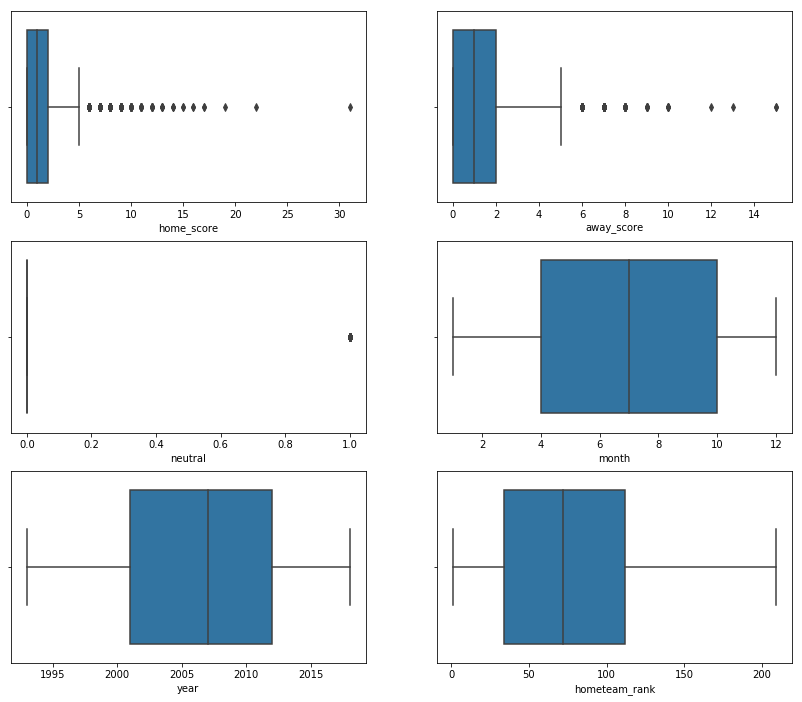

In [0]:
#created a list for all the numerical columns in the df dataframe
#used a for loop to iterate over the list of the numerical columns so as to plot all the boxplots
numericcols = ['home_score', 'away_score','neutral','month', 'year','hometeam_rank', 'awayteam_rank']
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize=(14,12))
for ax, data,column in zip(axes.flatten(),df,numericcols):
  sns.boxplot(df[column],ax=ax)

From the observations, the home score and away scores has presence of outliers. Next we shall check the unique values in both the columns to determine what to do with the outliers. There seems to be goal scores that are way too high. I shall remove them for the purpose of creating my model.

In [0]:
#dropping outliers in the awayscore and homescore columns
df=df[df['home_score']<=5]

In [0]:
df['home_score'].unique()

array([3, 1, 5, 0, 4, 2])

In [0]:
df=df[df['away_score']<=5]

In [0]:
df['away_score'].unique()

array([1, 0, 3, 2, 5, 4])

In [0]:
#this shows the descriptive statistics of the dataset
df.describe()

,home_score,away_score,month,year,hometeam_rank,awayteam_rank
count,17066.000000,17066.000000,17066.000000,17066.000000,17066.000000,17066.000000
mean,1.467069,1.022149,6.851107,2006.412985,76.466893,78.611450
std,1.278779,1.096611,3.295725,6.802316,50.294039,51.293821
min,0.000000,0.000000,1.000000,1993.000000,1.000000,1.000000
25%,0.000000,0.000000,4.000000,2001.000000,34.000000,36.000000
50%,1.000000,1.000000,7.000000,2007.000000,71.000000,73.000000
75%,2.000000,2.000000,10.000000,2012.000000,112.000000,114.000000
max,5.000000,5.000000,12.000000,2018.000000,209.000000,209.000000


In [0]:
#measures of central tendencies
#returns the middle value of the variable
df.median()

home_score          1.0
away_score          1.0
neutral             0.0
month               7.0
year             2007.0
hometeam_rank      71.0
awayteam_rank      73.0
dtype: float64

In [0]:
#returns the most frequent number that appears in the dataset
df.mode()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,hometeam_rank,awayteam_rank
0,Mexico,Zambia,1,0,Friendly,Doha,United States,False,win,6,2000,El Salvador vs Guatemala,5.0,1.0


In [0]:
##this shows the average of the variables in the dataset
df.mean()

home_score          1.467069
away_score          1.022149
neutral             0.231806
month               6.851107
year             2006.412985
hometeam_rank      76.466893
awayteam_rank      78.611450
dtype: float64

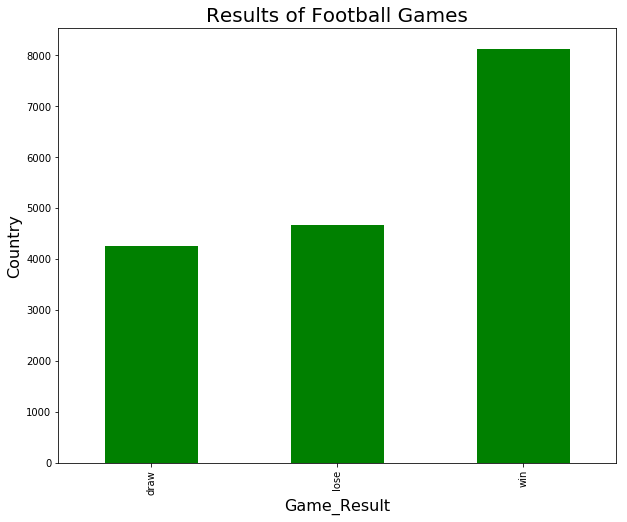

In [263]:
#plotting for wins
df.groupby('game_result')['country'].count().plot(kind = 'bar', color = 'green', figsize = (10,8))
plt.xlabel('Game_Result', fontsize = 16)
plt.ylabel('Results Total', fontsize = 16)
plt.title('Results of Football Games', fontsize = 20)
plt.show()

It can be seen that there are more wins in the game results. Loses and draws appear to be almost similar.

In [243]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'game_result', 'month', 'year', 'game',
       'hometeam_rank', 'awayteam_rank', 'tourna'],
      dtype='object')

In [0]:
#converting the column datatypes
df.dtypes

home_team         object
away_team         object
home_score         int64
away_score         int64
tournament        object
city              object
country           object
neutral             bool
game_result       object
month              int64
year               int64
game              object
hometeam_rank    float64
awayteam_rank    float64
dtype: object

In [0]:
#converting the column types to category datatype
df[['home_team', 'away_team','tournament','city', 'country','game_result','game']] = df[['home_team', 'away_team','tournament','city', 'country','game_result','game']].astype('category')

In [0]:
df.dtypes

home_team        category
away_team        category
home_score          int64
away_score          int64
tournament       category
city             category
country          category
neutral              bool
game_result      category
month               int64
year                int64
game             category
hometeam_rank     float64
awayteam_rank     float64
dtype: object

In [0]:
pairplot = df.drop('neutral', axis = 1)

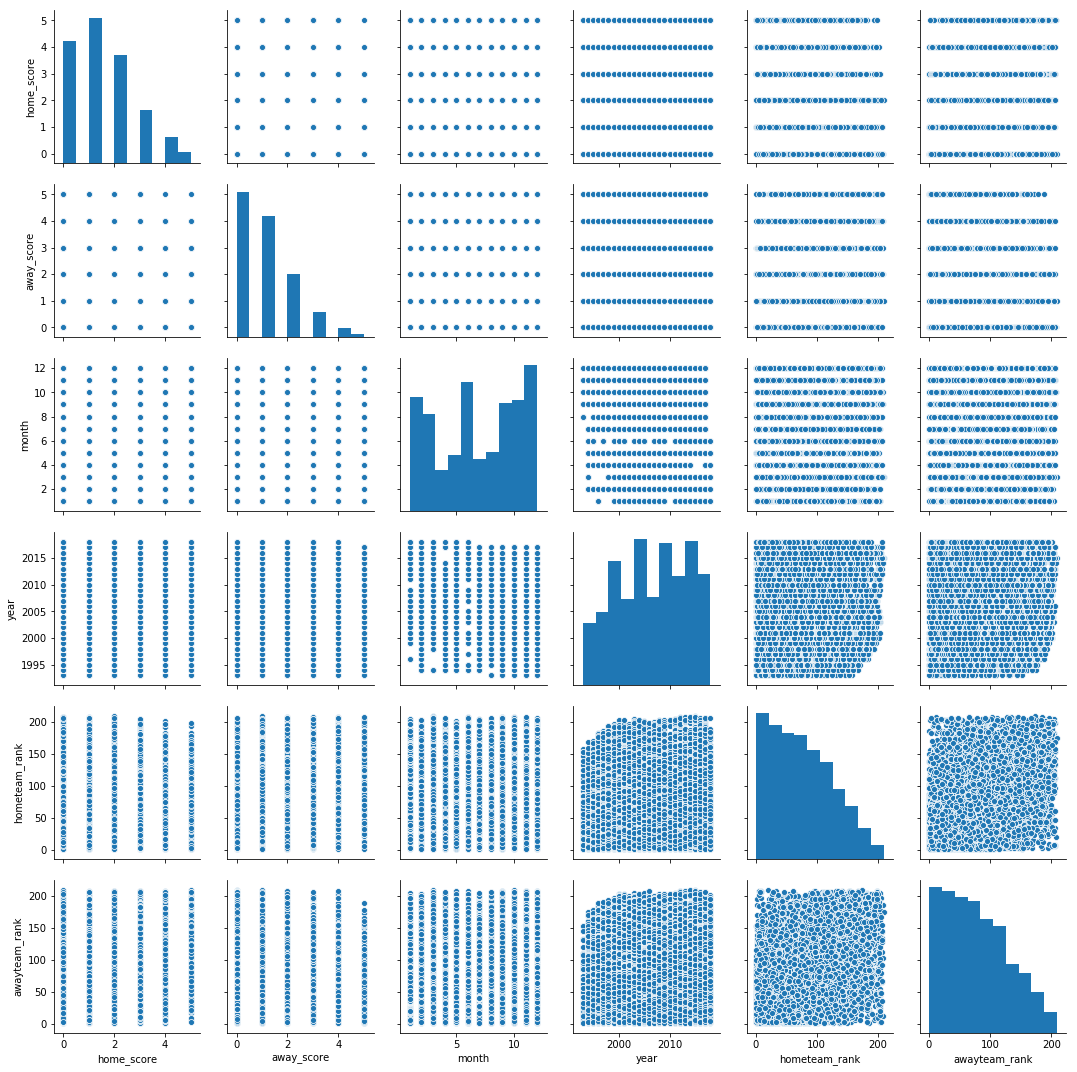

In [0]:
#plotting the scatter plots for my dataset 
#below shows the scatter plots and histograms of all the numerical variables in the data set
sns.pairplot(pairplot)

## Implementing the Solution
Here I shall perform Logistic regression to predict the result of a game, either a win, loss or draw and Polynomial regression to predict how many goals a team can score in a match 

In [0]:
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,hometeam_rank,awayteam_rank,tourna
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,0,win,8,1993,Bolivia vs Uruguay,59.0,22.0,others
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,0,draw,8,1993,Brazil vs Mexico,8.0,14.0,friendly
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,0,win,8,1993,Ecuador vs Venezuela,35.0,94.0,others
3,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,0,win,8,1993,Guinea vs Sierra Leone,65.0,86.0,friendly
4,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,0,win,8,1993,Guinea vs Sierra Leone,65.0,86.0,friendly


In [0]:
df['neutral'].unique()

array([False,  True])

In [0]:
#performing feature engineering in variables that need encoding
df['neutral'] = pd.get_dummies(df['neutral'], drop_first = True)

In [0]:
#checking the unique observations in the tournament column so as to have 3 tournament types: world cup, friendly and others
df['tournament'].unique().to_list()

['FIFA World Cup qualification',
 'Friendly',
 'African Cup of Nations qualification',
 'Amílcar Cabral Cup',
 'United Arab Emirates Friendship Tournament',
 'Malta International Tournament',
 'CFU Caribbean Cup qualification',
 'African Cup of Nations',
 'CFU Caribbean Cup',
 'UEFA Euro qualification',
 'Kirin Cup',
 'FIFA World Cup',
 'Oceania Nations Cup qualification',
 'Baltic Cup',
 'Gulf Cup',
 'Simba Tournament',
 'CECAFA Cup',
 'Dynasty Cup',
 "King's Cup",
 'SAFF Cup',
 'Copa Paz del Chaco',
 'Korea Cup',
 'USA Cup',
 'Copa América',
 'Merdeka Tournament',
 'South Pacific Games',
 'UNCAF Cup',
 'Oceania Nations Cup',
 'Windward Islands Tournament',
 'Gold Cup',
 'AFC Asian Cup qualification',
 'Lunar New Year Cup',
 'AFF Championship',
 'AFC Asian Cup',
 'King Hassan II Tournament',
 'Cyprus International Tournament',
 'Dunhill Cup',
 'Nehru Cup',
 'COSAFA Cup',
 'Tournoi de France',
 'Confederations Cup',
 'UAFA Cup',
 'Gold Cup qualification',
 'UNIFFAC Cup',
 'Nordic Champ

In [0]:
#using a finction to have 3 tournament types
def tourna(x):
  if x == 'Fifa World Cup':
    return 'world cup'
  elif x == 'Friendly':
    return 'friendly'
  else:
    return 'others'

In [0]:
#applying the function for the tournament types
df['tourna']=df.tournament.apply(lambda x: tourna(x))

In [0]:
#dropping the column tornament and remaining with the tourna column that has the 3 tournament types
df.drop('tournament', axis =1)

# Polynomial Regression

In [0]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'game_result', 'month', 'year', 'game',
       'hometeam_rank', 'awayteam_rank', 'tourna'],
      dtype='object')

In [0]:
#checking for multicollinearity
# Let's display the correlations between the variables
correlations = df.corr()

correlations

,home_score,away_score,neutral,month,year,hometeam_rank,awayteam_rank
home_score,1.000000,-0.121875,-0.043080,0.028418,-0.031473,-0.155077,0.258048
away_score,-0.121875,1.000000,0.076531,0.014678,-0.002868,0.171942,-0.191100
neutral,-0.043080,0.076531,1.000000,-0.097834,0.049733,0.013567,0.039027
month,0.028418,0.014678,-0.097834,1.000000,-0.001092,0.027648,0.033725
year,-0.031473,-0.002868,0.049733,-0.001092,1.000000,0.102570,0.107572
hometeam_rank,-0.155077,0.171942,0.013567,0.027648,0.102570,1.000000,0.494345
awayteam_rank,0.258048,-0.191100,0.039027,0.033725,0.107572,0.494345,1.000000


the table shows that the variables are related to one another.

In [0]:
#compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,neutral,month,year,hometeam_rank,awayteam_rank
home_score,1.217034,-0.044124,0.066912,-0.021372,0.047123,0.468528,-0.561060
away_score,-0.044124,1.162425,-0.105625,-0.029493,0.002610,-0.426886,0.449391
neutral,0.066912,-0.105625,1.026521,0.101813,-0.044475,0.071475,-0.111496
month,-0.021372,-0.029493,0.101813,1.012417,-0.000033,-0.011528,-0.032537
year,0.047123,0.002610,-0.044475,-0.000033,1.019044,-0.050242,-0.094708
hometeam_rank,0.468528,-0.426886,0.071475,-0.011528,-0.050242,1.653167,-1.016713
awayteam_rank,-0.561060,0.449391,-0.111496,-0.032537,-0.094708,-1.016713,1.748903


awayteam_rank has a value of 1.74 which is the highest. Removing it from the dataset to see if the VIF will imporve

In [0]:
revised = df.drop(columns=['awayteam_rank'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,neutral,month,year,hometeam_rank
home_score,1.037042,0.100043,0.031143,-0.031810,0.016740,0.142360
away_score,0.100043,1.046951,-0.076975,-0.021132,0.026946,-0.165636
neutral,0.031143,-0.076975,1.019412,0.099739,-0.050513,0.006658
month,-0.031810,-0.021132,0.099739,1.011812,-0.001795,-0.030443
year,0.016740,0.026946,-0.050513,-0.001795,1.013915,-0.105300
hometeam_rank,0.142360,-0.165636,0.006658,-0.030443,-0.105300,1.062108


It improves just a bit showing home score and away team rank are collinear

In [0]:
#Residual plots and heteroskedasticity testing

In [0]:
#getting the columns so as to perform polynomial regression
#starting with predicting the homescore using the homerank
X = df['hometeam_rank'].values.reshape(-1,1)
y = df['home_score'].values
print(X)
print(y)

[[59.]
 [ 8.]
 [35.]
 ...
 [12.]
 [ 7.]
 [14.]]
[3 1 5 ... 0 4 2]


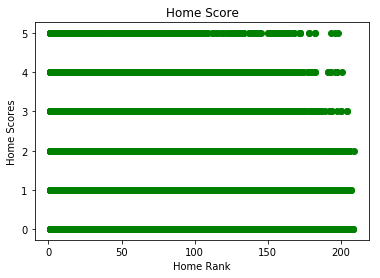

In [0]:
#visualizing the dataset by plotting a scatter plot
plt.scatter(X, y, color='green') 
plt.title('Home Score')
plt.xlabel('Home Rank')
plt.ylabel('Home Scores')
plt.show()

From the scatter plot, the data does not appear to be linear and hence polynomial regression will be the best option.

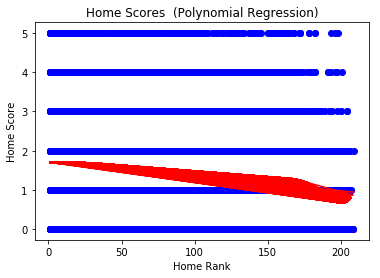

In [0]:
#Polynomial Regression
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 10) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home Scores  (Polynomial Regression)')
plt.xlabel('Home Rank')
plt.ylabel('Home Score')
plt.show()


Looking at the graph, the polynomial graph does not give better results and I cannot draw a meaning conclusion from it since the curve is not passing through many points. The graph is not fully optiized.



In [0]:
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([1.70280446])

In [0]:
#getting the columns so as to perform polynomial regression
#starting with predicting the homescore using the homerank
X = df['awayteam_rank'].values.reshape(-1,1)
y = df['away_score'].values
print(X)
print(y)


[[22.]
 [14.]
 [94.]
 ...
 [ 3.]
 [ 5.]
 [ 4.]]
[1 1 0 ... 1 3 1]


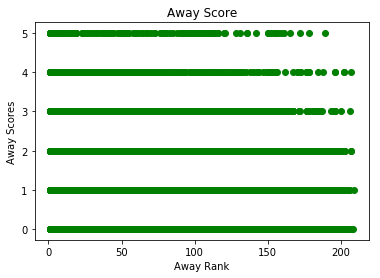

In [0]:
#visualizing the dataset by plotting a scatter plot
plt.scatter(X, y, color='green') 
plt.title('Away Score')
plt.xlabel('Away Rank')
plt.ylabel('Away Scores')
plt.show()

The same trend can be seen using the away score. 

## Logistic Regression

In [0]:
df.head(5)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,hometeam_rank,awayteam_rank,tourna
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,0,win,8,1993,Bolivia vs Uruguay,59.0,22.0,others
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,0,draw,8,1993,Brazil vs Mexico,8.0,14.0,friendly
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,0,win,8,1993,Ecuador vs Venezuela,35.0,94.0,others
3,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,0,win,8,1993,Guinea vs Sierra Leone,65.0,86.0,friendly
4,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,0,win,8,1993,Guinea vs Sierra Leone,65.0,86.0,friendly


In [0]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'game_result', 'month', 'year', 'game',
       'hometeam_rank', 'awayteam_rank', 'tourna'],
      dtype='object')

In [0]:
#creating a dataframe that i shall use to train my logistic regression model
newdf = df[['home_team', 'away_team', 'home_score', 'away_score', 'year', 'hometeam_rank', 'awayteam_rank', 'tourna','game_result']]

In [0]:
newdf.head()

,home_team,away_team,home_score,away_score,year,hometeam_rank,awayteam_rank,tourna,game_result
0,Bolivia,Uruguay,3,1,1993,59.0,22.0,others,0
1,Brazil,Mexico,1,1,1993,8.0,14.0,friendly,1
2,Ecuador,Venezuela,5,0,1993,35.0,94.0,others,0
3,Guinea,Sierra Leone,1,0,1993,65.0,86.0,friendly,0
4,Guinea,Sierra Leone,1,0,1993,65.0,86.0,friendly,0


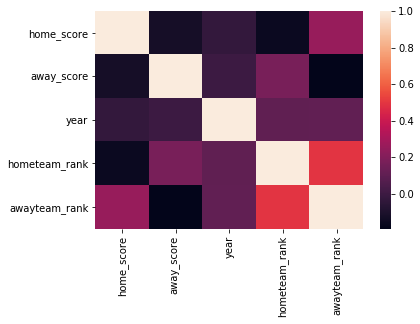

In [0]:
# Checking for independence between features
# 
sns.heatmap(newdf.corr())  

In [0]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'game_result', 'month', 'year', 'game',
       'hometeam_rank', 'awayteam_rank', 'tourna'],
      dtype='object')

In [0]:
# Splitting our dataset
#
X = newdf.drop(['game_result','home_score','away_score'],axis=1)
y = newdf['game_result']

#encoding the features
X = pd.get_dummies(X, drop_first=True)
X.head()


,year,hometeam_rank,awayteam_rank,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,...,away_team_Seychelles,away_team_Sierra Leone,away_team_Singapore,away_team_Slovakia,away_team_Slovenia,away_team_Solomon Islands,away_team_Somalia,away_team_South Africa,away_team_South Sudan,away_team_Spain,away_team_Sri Lanka,away_team_Sudan,away_team_Suriname,away_team_Sweden,away_team_Switzerland,away_team_Syria,away_team_Tahiti,away_team_Tajikistan,away_team_Tanzania,away_team_Thailand,away_team_Togo,away_team_Tonga,away_team_Trinidad and Tobago,away_team_Tunisia,away_team_Turkey,away_team_Turkmenistan,away_team_Turks and Caicos Islands,away_team_Uganda,away_team_Ukraine,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Zambia,away_team_Zimbabwe,tourna_others
0,1993,59.0,22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1993,8.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1993,35.0,94.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1993,65.0,86.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1993,65.0,86.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)
#fitting the model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction
y_pred = LogReg.predict(X_test)
y_pred
#Evaluating the model
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[   6,  289,  550],
       [   2,  542,  442],
       [   4,  228, 1351]])

In [0]:
accuracy_score(y_pred,y_test)

0.5562390158172232

Accuracy score is 55.6% which is low and cannot be used to make correct predictions. Probably more data needs to be sought so as to improve the model.